<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/0811.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [25]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

In [26]:
df_raw = pd.read_csv('/content/mydrive/MyDrive/HMEQ.csv')

print(df_raw.shape)
df_raw.head()

(3748, 13)


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [27]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3734 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3667 non-null   object 
 6   YOJ      3543 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3718 non-null   float64
 9   CLAGE    3711 non-null   float64
 10  NINQ     3692 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [28]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [29]:
df_raw['JOB'].fillna('Other', inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [30]:
df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [31]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [32]:
df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)
df_raw_y = df_raw_dummy['BAD']

In [33]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,
                                                                df_raw_y,
                                                                test_size = 0.3,
                                                                random_state = 1234)

print('분할 전 설명변수 데이터 : ', df_raw_x.shape)
print('분할 후 설명변수 데이터 : Train {}, Test {}'.format(df_raw_x.shape, df_test_x.shape))

분할 전 설명변수 데이터 :  (3748, 18)
분할 후 설명변수 데이터 : Train (3748, 18), Test (1125, 18)


In [34]:
print(df_raw.value_counts(['BAD'], '\n'))
print('BAD = 1 비율 : {}'.format(df_raw.value_counts(df_raw['BAD'] == 1) / len(df_raw)))

BAD
0      0.907951
1      0.092049
dtype: float64
BAD = 1 비율 : BAD
False    0.907951
True     0.092049
dtype: float64


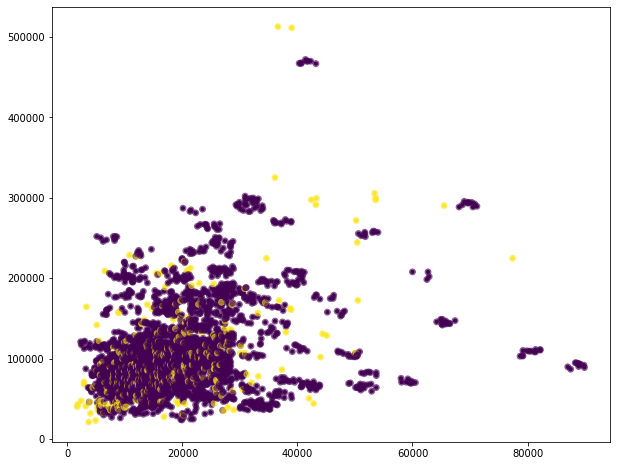

In [35]:
plt.figure(figsize = (10,8))
plt.scatter(df_raw['LOAN'], df_raw['VALUE'], c = df_raw['BAD'], s = 10)
plt.scatter(df_raw['LOAN'], df_raw['VALUE'], c = df_raw['BAD'], alpha = 0.5)
plt.show()

'1' 빈도가 적음 (9.2%)

In [36]:
sm = SMOTE(sampling_strategy = 'auto')

x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)

print('Over-Sampling 전 : \n', df_train_y.value_counts(), '\n')
print('Over-Sampling 후 Train X : {}',format(x_resampled.shape))
print('Over-Sampling 후 Train Y : {}'.format(y_resampled.shape))
print('Over-Sampling 후 "1" : {}'.format(sum(y_resampled == 1)))
print('Over-Sampling 후 "0" : {}'.format(sum(y_resampled == 0)))

Over-Sampling 전 : 
 0    2382
1     241
Name: BAD, dtype: int64 

Over-Sampling 후 Train X : {} (4764, 18)
Over-Sampling 후 Train Y : (4764,)
Over-Sampling 후 "1" : 2382
Over-Sampling 후 "0" : 2382


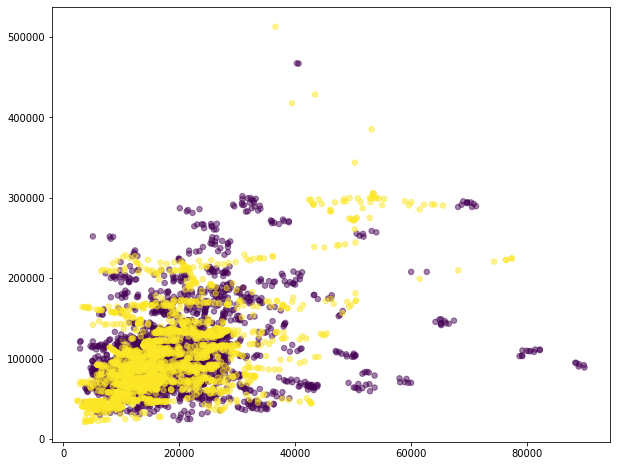

In [37]:
df_resampled = pd.concat([x_resampled, y_resampled], axis = 1)
# print(df_resampled.head())

plt.figure(figsize = (10,8))
plt.scatter(df_resampled['LOAN'], df_resampled['VALUE'], c = df_resampled['BAD'], s = 30, alpha = 0.5)

'1' 빈도 = '0' 빈도

### **모델 생성**

In [38]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set : 0.932


train과 test 데이터에 대해 각각 100%, 93.2%의 설명력을 갖는다. 해당 모델은 train 데이터에 대해 과대적합의 모습을 보여주고 있는 것으로 해석된다.

### **모델 parameter 조정하기 : max_depth**

In [39]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    tree = DecisionTreeClassifier(max_depth = v_max_depth, 
                                  random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [40]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.926,0.924
1,2,0.931,0.927
2,3,0.934,0.921
3,4,0.937,0.928
4,5,0.940,0.930
5,6,0.941,0.930
6,7,0.947,0.935
7,8,0.951,0.933
8,9,0.957,0.933
9,10,0.960,0.938


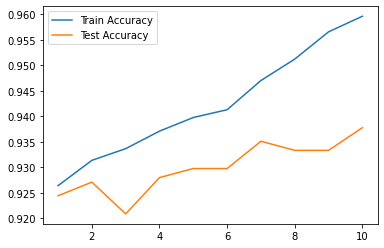

In [41]:
plt.plot(para_depth, train_accuracy,linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy,linestyle = '-', label = 'Test Accuracy')
plt.legend()

- 최대 깊이가 증가함에 따라 모델의 정확도 역시 증가한다.
- train/test 데이터의 성능 변화를 고려하여 **max_depth = 4** 선택

In [44]:
v_feature_name = df_train_x.columns

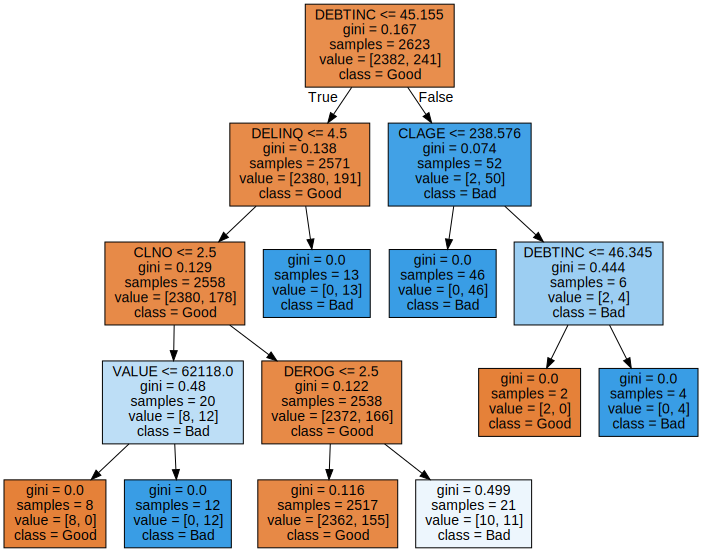

In [45]:
# 깊이가 4인 모델

tree_low = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, 
                out_file = 'tree_low.dot', 
                class_names = ['Good', 'Bad'], 
                feature_names = v_feature_name, 
                impurity = True, 
                filled = True)

with open('tree_low.dot') as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

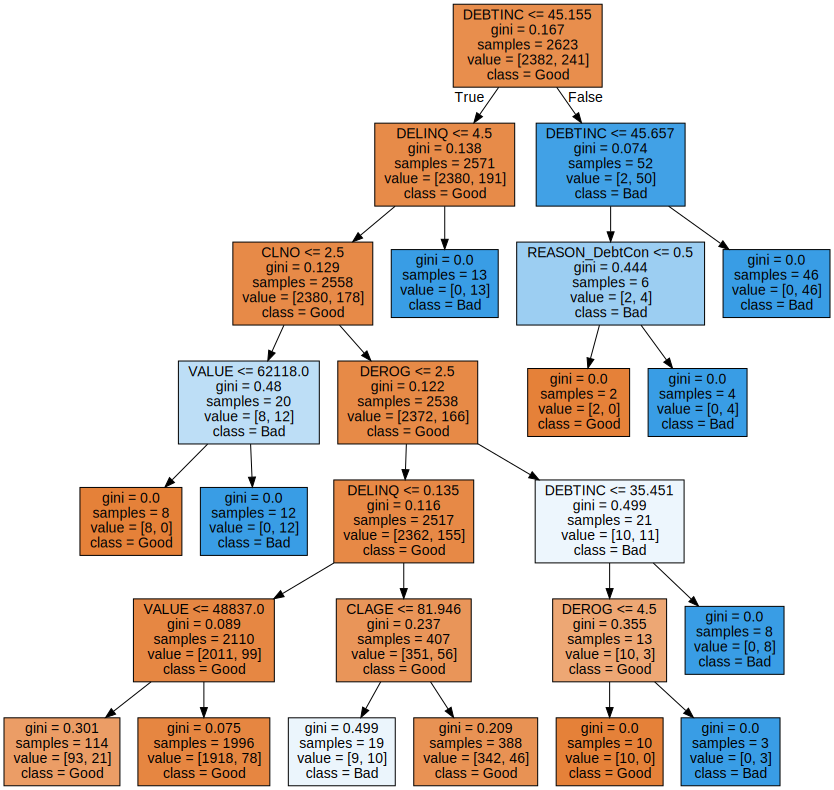

In [46]:
# 깊이가 6인 모델

tree_high = DecisionTreeClassifier(max_depth = 6,
                                   random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, 
                out_file = 'tree_high.dot', 
                class_names = ['Good', 'Bad'], 
                feature_names = v_feature_name, 
                impurity = True, 
                filled = True)

with open('tree_high.dot') as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### **모델 Parameter 조정 : min_samples_split**

In [ ]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    tree = DecisionTreeClassifier(max_depth = 4,
                                  min_samples_split = v_min_samples_split, 
                                  random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [ ]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.926,0.924
1,2,0.931,0.927
2,3,0.934,0.921
3,4,0.937,0.928
4,5,0.940,0.930
5,6,0.941,0.930
6,7,0.947,0.935
7,8,0.951,0.933
8,9,0.957,0.933
9,10,0.960,0.938


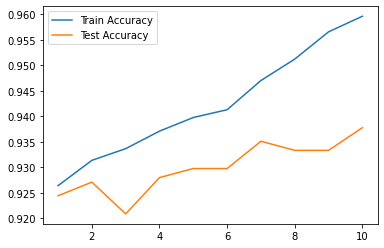

In [ ]:
plt.plot(para_depth, train_accuracy,linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy,linestyle = '-', label = 'Test Accuracy')
plt.legend()

- 최대 깊이가 증가함에 따라 모델의 정확도 역시 증가한다.
- train/test 데이터의 성능 변화를 고려하여 **max_depth = 4** 선택

In [ ]:
v_feature_name = df_train_x.columns

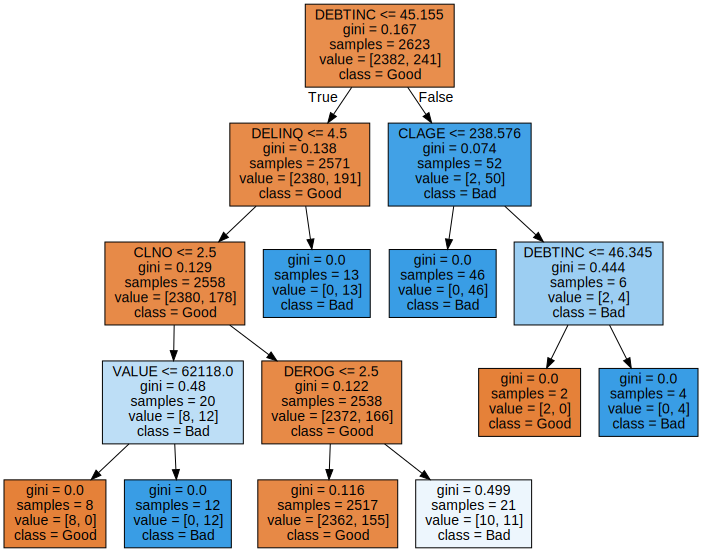

In [ ]:
# 깊이가 4인 모델

tree_low = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, 
                out_file = 'tree_low.dot', 
                class_names = ['Good', 'Bad'], 
                feature_names = v_feature_name, 
                impurity = True, 
                filled = True)

with open('tree_low.dot') as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

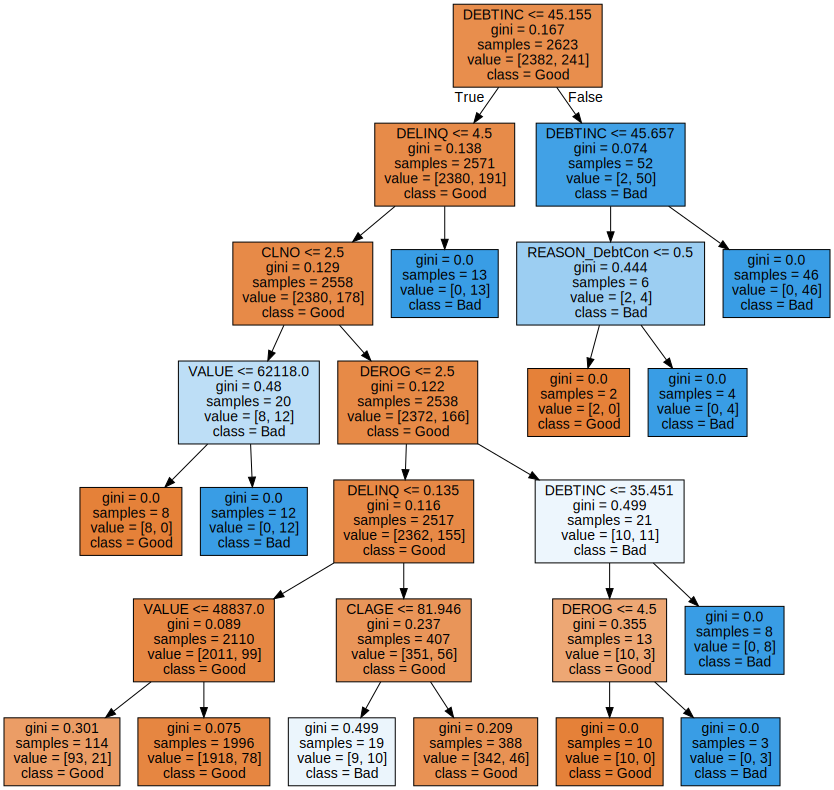

In [ ]:
# 깊이가 6인 모델

tree_high = DecisionTreeClassifier(max_depth = 6,
                                   random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, 
                out_file = 'tree_high.dot', 
                class_names = ['Good', 'Bad'], 
                feature_names = v_feature_name, 
                impurity = True, 
                filled = True)

with open('tree_high.dot') as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))